In [1]:
import sympy as sp
sp.init_printing()
from pynoa import *

Set `autosave` to **True** if you want to save the object files automatically.

Set the directory where you want to save the file in `NOA_obj_save_dir`

In [2]:
autosave = False
NOA_obj_save_dir = "backup/example_martinelli_mobile_robot"

# A Simple Example of Localization
From Equation (3) of Martinelli's paper.   
Original process model $\dot{\mathbf{x}}=\mathbf{f}(\mathbf{x},\mathbf{u})$:

\begin{equation}
    \begin{aligned}
        \dot{D} &= v \cos(\theta_R - \phi_R) \\
        \dot{\phi_R} &= \frac{v}{D} \sin(\theta_R - \phi_R) \\
        \dot{\theta_R} &= \omega
    \end{aligned}
\end{equation}
and measurement model $\mathbf{y}=\mathbf{h}(\mathbf{x},\mathbf{u})$:
\begin{equation}
    y = \pi - \theta_R + \phi_R
\end{equation}
where:
* the state vector $\mathbf{x} = \begin{bmatrix} 
                                    D & \phi_R & \theta_R
                                    \end{bmatrix}^\top$
* the control inputs $\mathbf{u} =  \begin{bmatrix} 
                                    v & \omega
                                    \end{bmatrix}^\top$


In [3]:
# State vector
D, phi_R, theta_R = sp.symbols("D, phi_R, theta_R")
mobile_robot = NOA("mobile_robot_symbolic")
mobile_robot.x = sp.Matrix([D, phi_R, theta_R])

mobile_robot_symbolic NOA object initialized


Convert the process model into the control-affine form:

\begin{equation}
\mathbf{\dot x}=
\mathbf{f}_0(\mathbf{x})
+
\sum_{i=1}^m\mathbf{f}_i(\mathbf{x})u_i.
\end{equation}

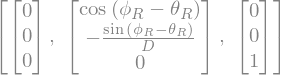

In [4]:
# Control-affine vector fields of process model \dot{x} = f(x,u)
f0 = sp.zeros(3,1)
f1 = sp.Matrix([[sp.cos(theta_R-phi_R), sp.sin(theta_R-phi_R)/D, 0]]).T
f2 = sp.Matrix([[0,0,1]]).T
mobile_robot.f = [f0, f1, f2]
mobile_robot.f

In [5]:
# Measurement model y=h(x,u)
mobile_robot.h = sp.Matrix([sp.pi - theta_R + phi_R])
mobile_robot.h

Permutation of Vector Fields
[(0,), (1,), (2,)]
current Lie derivative:  k1f0  not appended to observability matrix due to null vector
current Lie derivative:  k1f1 appended to observability matrix
current Lie derivative:  k1f2  not appended to observability matrix due to null vector
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
current Lie derivative:  k2f0f0  not appended to observability matrix due to null vector
current Lie derivative:  k2f0f1  not appended to observability matrix due to null vector
current Lie derivative:  k2f0f2  not appended to observability matrix due to null vector
current Lie derivative:  k2f1f0  not appended to observability matrix due to null vector
current Lie derivative:  k2f1f1 appended to observability matrix
current Lie derivative:  k2f1f2 appended to observability matrix
current Lie derivative:  k2f2f0  not appended to observability matrix due to null vector
current Lie derivative:  k2f2f1  not appended to observability matr

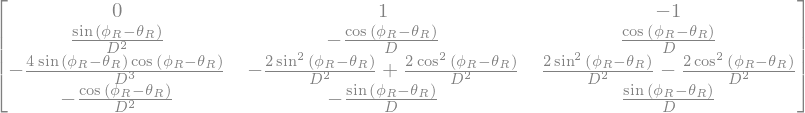

In [6]:
# Observability rank criterion using NOA object
mobile_robot.ORC()
mobile_robot.obsv_mat

The observable modes are g(x) which satisfiy these partial differential equations (PDE): 


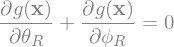

Observable modes: 


In [7]:
mobile_robot.null_calc_opt = "symbolic"
mobile_robot.observable_mode()

In [8]:
if(autosave):
    mobile_robot.save(NOA_obj_save_dir)

In [9]:
mobile_robot_num = NOA("mobile_robot_numeric")
mobile_robot_num.x = mobile_robot.x
mobile_robot_num.f = mobile_robot.f
mobile_robot_num.h = mobile_robot.h
# mobile_robot_num.LD_order = 2
mobile_robot_num.combn_permn_opt = "drift2ndOrder"
mobile_robot_num.rank_calc_opt = "numeric"
mobile_robot_num.params_config_subs = sp.Matrix([mobile_robot_num.x])
# new_params_dict = {D: 2, phi_R: sp.pi/5, theta_R: sp.pi/7}
# mobile_robot_num.update_params_dict(new_params_dict)
mobile_robot_num.ORC()

mobile_robot_numeric NOA object initialized
Drift 2nd Order Vector Fields
[(0,), (1,), (2,)]
current Lie derivative:  k1f0  not appended to observability matrix due to null vector
current Lie derivative:  k1f1 appended to observability matrix
current Lie derivative:  k1f2  not appended to observability matrix due to null vector
[(0, 1), (0, 2)]
current Lie derivative:  k2f0f1  not appended to observability matrix due to null vector
current Lie derivative:  k2f0f2  not appended to observability matrix due to null vector
Insufficient obsv_mat rows. Auto-construct obsv_mat using Permutation of vector fields ...
Permutation of Vector Fields
[(0,), (1,), (2,)]
current Lie derivative:  k1f0  not appended to observability matrix due to null vector
current Lie derivative:  k1f1 appended to observability matrix
current Lie derivative:  k1f2  not appended to observability matrix due to null vector
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
current Lie derivative:  k

The observable modes are g(x) which satisfiy these partial differential equations (PDE): 


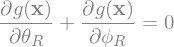

Observable modes: 


In [10]:
mobile_robot_num.observable_mode()

In [11]:
if(autosave):
    mobile_robot_num.save(NOA_obj_save_dir)